<a href="https://colab.research.google.com/github/geeorgebixleer/Inmersion_datos_Alura/blob/main/P2_Inmuebles_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning: Algoritmo para predecir precios de inmuebles en Bogotá**

- El conjunto de datos evaluados corresponden a la "Encuesta Multipropósito Bogotá - Cundinamarca - EM - 2021", con ellos Se evaluaron algunas atributos referente a informaciones socioeconomicas, las cuáles ayudarán a predecir el valor real de los inmuebles en Bogotá.

- Esta operación estadística recoge de manera robusta y periódica las condiciones de vida de la población, permitiendo visualizar comportamientos y cambios en el tiempo por lo que se constituye en el insumo más relevante de información socioeconómica para el proceso de toma de decisiones de política pública y el diseño de instrumentos de planeación de largo plazo en el Distrito capital y la región. Con la Encuesta Multipropósito Bogotá-Cundinamarca aplicada en 2021, la SDP (Secretaría Distrital de Planeación) decide dar continuidad a la línea base de información estadística, incluyendo la zona urbana de 21 municipios y, por primera vez, la zona rural de 7 municipios seleccionados de Cundinamarca. Con este avance, se continúa la consolidación de información estadística de Bogotá y la región para dar grandes pasos hacia la identificación de los factores que inciden en las dinámicas que confluyen en grandes capitales como Bogotá.

Los datos fueron tomados de datos públicos del Departamento Administrativo Nacional de Estadística (DANE), disponibles en: https://microdatos.dane.gov.co/index.php/catalog/743

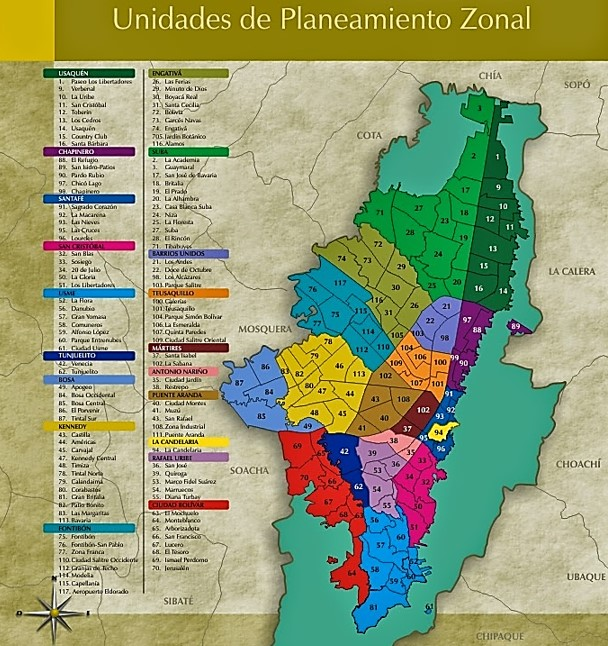

#1.Configurando el ambiente

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #para regresión lineal
from sklearn.model_selection import train_test_split #segmentar datos para entretamiento y prueba
from sklearn.metrics import mean_absolute_error, r2_score

##2.Obtención y transformación de datos

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
datos_dane = pd.read_csv('/content/drive/MyDrive/Inmersión de Datos - Alura/A4/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [129]:
print('- Número de filas y columnas del df: ', datos_dane.shape)
print(' \n - - - - - - - - - - - - - ')
print('- Columnas del dataframe:')
print(datos_dane.columns)

- Número de filas y columnas del df:  (9857, 55)
 
 - - - - - - - - - - - - - 
- Columnas del dataframe:
Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'NVCBP4',
       'NVCBP14A', 'NVCBP14D', 'NVCBP14E', 'NVCBP14G', 'NVCBP15A', 'NVCBP15C',
       'NVCBP15F', 'NVCBP15G', 'NVCBP16A3', 'NVCBP16A4', 'NPCKP17', 'NPCKP18',
       'NPCKP23', 'NPCKP44A', 'NPCKPN62A', 'NPCKPN62B', 'NPCKP64A', 'NPCKP64E',
       'NHCCP3', 'NHCCP6', 'NHCCP7', 'NHCCP8_1', 'NHCCP8_2', 'NHCCP8_3',
       'NHCCP8_6', 'NHCCP8_7', 'NHCCP8_8', 'NHCCP8_9', 'NHCCP9', 'NHCCP11',
       'NHCCP11A', 'NHCCP12', 'NHCCP41', 'NHCCP41A', 'NHCCP47A', 'NHCCP47B',
       'NHCLP2A', 'NHCLP2B', 'NHCLP2C', 'NHCLP2E', 'NHCLP4', 'NHCLP5',
       'NHCLP8AB', 'NHCLP8AE', 'NHCLP10', 'NHCLP11', 'NHCLP29_1A',
       'NHCLP29_1C', 'NHCLP29_1E', 'NHCLP29_1F', 'NPCHP4'],
      dtype='object')


In [130]:
# diccionario con nuevos nombres para columnas
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

df_dane = datos_dane.rename(columns=dic_dane) #renombrando columnas del dataframe

In [131]:
# dataframe con columnas actualizadas
print('- Número de filas y columnas del df: ', df_dane.shape)
print(' \n - - - - - - - - - - - - - ')
print('- Columnas del dataframe:')
print(df_dane.columns)

- Número de filas y columnas del df:  (9857, 55)
 
 - - - - - - - - - - - - - 
- Columnas del dataframe:
Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COM

In [132]:
# reemplazando valor de los campos '2' por '0'
datos = df_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos.head()

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1


In [133]:
# verificando consistencia en barrio '20 de julio' (sustitución de 2 -> 0)
print('- No existe alteración en el barrio "20 de julio", pues es de tipo string \n')
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

- No existe alteración en el barrio "20 de julio", pues es de tipo string 



,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.0,1.0,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.0,1.0,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.0,1.0,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.0,1.0,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.0,1.0,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.0,1.0,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.0,1.0,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.0,1.0,0,0,1


En la siguiente tabla se muestra el promedio de la votación de los participantes de la encuesta referente a determinadas características evaluadas por barrio. Por tanto, podemos afirmar que:

*Respecto al barrio "20 de Julio":*
- 11% de las viviendas corresponde a departamentos o condominios cerrados
- 81% de las personas dijo ser inseguro
- Casi 15% dijo contar con terminales de bus
- El salario promedio mensual es de $1 millon y medio de pesos
- El 84% tienen escrituras de sus inmuebles


In [134]:
# calculando el promedio agrupado por 'nombre_estrato', seleccionando ciertos atributos
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.106667,0.813333,0.146667,0.106667,0.440000,0.160000,1.493860e+06,0.840000,0.080000,0.320000,0.200000
Américas,0.616822,0.747664,0.018692,0.214953,0.392523,0.084112,2.672138e+06,0.943925,0.028037,0.280374,0.149533
Apogeo,0.349206,0.698413,0.253968,0.063492,0.317460,0.000000,1.837583e+06,0.920635,0.079365,0.349206,0.079365
Arborizadora,0.569892,0.698925,0.053763,0.118280,0.311828,0.161290,1.802297e+06,0.967742,0.118280,0.387097,0.182796
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.632653,0.673469,0.010204,0.020408,0.295918,0.132653,2.943731e+06,0.948980,0.051020,0.295918,0.061224
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
Venecia,0.472222,0.819444,0.236111,0.291667,0.500000,0.361111,2.078713e+06,0.833333,0.138889,0.402778,0.250000
Verbenal,0.771429,0.561905,0.076190,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714


In [135]:
# dataset con datos por 'tipo' de inmueble
inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersión de Datos - Alura/A4/inmuebles.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,5.142857,4.572009
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.941176,3.403589
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,7.777778,8.104487
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.779221,5.655581
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,7.578125,6.290551


In [136]:
# flas y columnas de dataset 'inmuebles'
inmuebles.shape

(9520, 13)

In [137]:
# join: left 'datos_tratados' e 'inmuebles'
datos_ml = pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503


In [138]:
# flas y columnas del nuevo dataset 'datos_ml'
datos_ml.shape

(9520, 24)

In [139]:
# dataset que contiene los números de codigo para cada UPZ (Nombre_estrato)
upz = pd.read_csv('/content/drive/MyDrive/Inmersión de Datos - Alura/A4/cod_upz.csv')
upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.0
1,Santa Isabel,37.0
2,USAQUÉN: Country Club + Santa Bárbara,803.0
3,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Ciudad Salitre Occidental,110.0


In [140]:
# join: inner 'datos ml' - 'UPZ'
datos_ml = pd.merge(datos_ml, upz, left_on = 'UPZ', right_on = 'NOMBRE_ESTRATO', how = 'inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0


In [141]:
# total de filas y columnas del datset 'datos_ml' ('inmuebles' + 'datos_tratdos' + 'upz')
datos_ml.shape

(9318, 26)

- Dato que el dataset anterior no considera el total de inmuebles presentados en el dataset original 'inmuebles', el total de registros disminuye (9520 -> 9318).
- Para realizar la regresión lineal se necesita que los datos sean de tipo numérico.


##3.Visualización y correlación de variables numéricas - Parte I

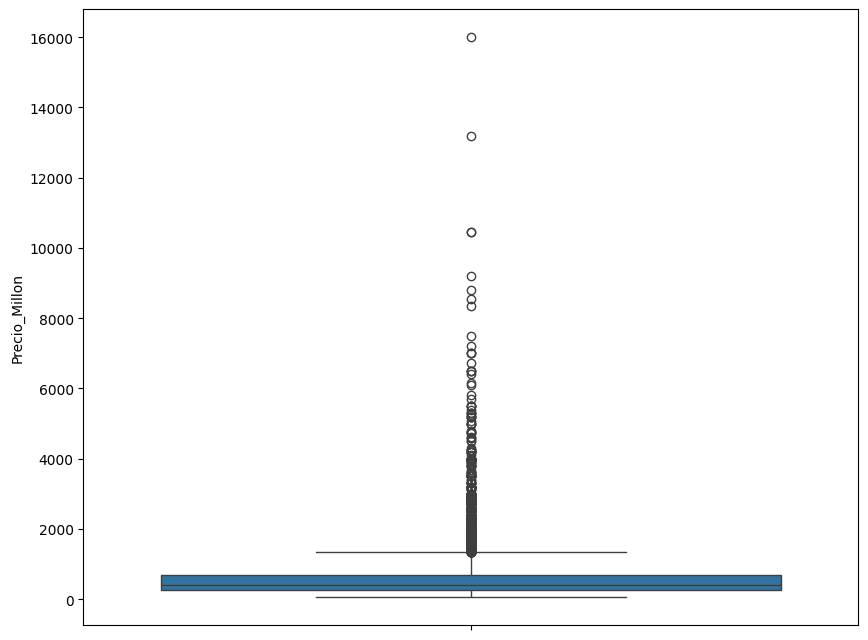

In [142]:
# gráfico de caja que muestra el rango de valores de inmuebles por 'Precio_Millon'
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

- El grafico muestra demasiados outliers, los cuáles no necesariamente son datos erroneos, pero disparan demasiado la diferencia de precios, por lo que procederemos a aplicar un filtro por rango de datos.

In [143]:
# datos 'outliers':
outliers = datos_ml.query('Precio_Millon > 5000')
outliers

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0


In [144]:
# filtro que selecciona los inmuebles por precio > 60 & < 5000
datos_ml = datos_ml.query('Precio_Millon > 60 & Precio_Millon < 5000')

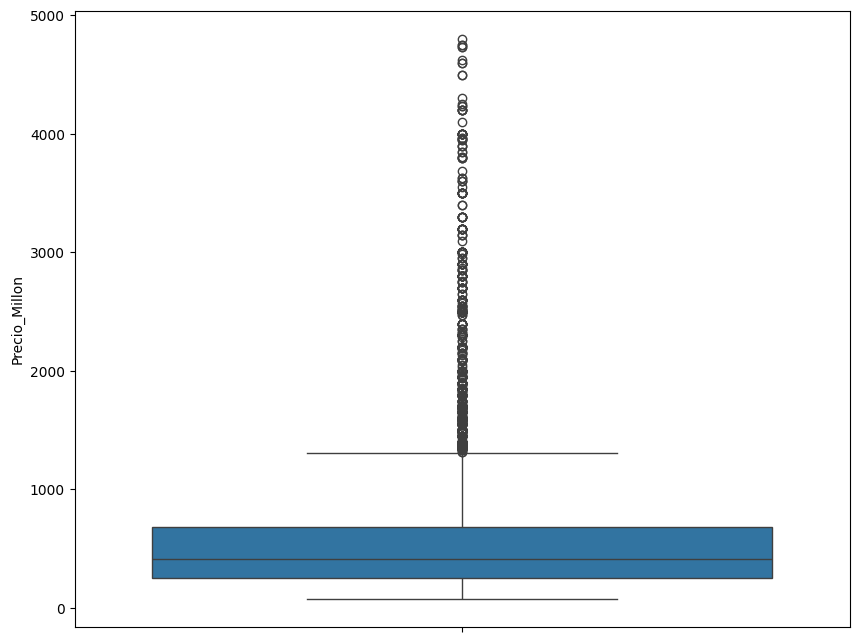

In [145]:
# gráfico de caja sin outliers
plt.figure(figsize=(10,8))
sns.boxplot(data = datos_ml, y = 'Precio_Millon')
plt.show()

- Con el anterior gráfico de caja se observa que el 'precio_millon', es decir, el precio de vivienda oscila al rededor de 220-550 millones de pesos colombianos. La mediana es de cerca de 480 millones.

In [146]:
# nuevo atributo para el salario anual en millones
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000 #se divide para eliminar 0 y visualizar comodamente
datos_ml['SALARIO_ANUAL_MI']

0       48.417456
1       48.417456
2       48.417456
3       48.417456
4       48.417456
          ...    
9313    29.344838
9314    29.344838
9315    29.344838
9316    29.344838
9317    29.344838
Name: SALARIO_ANUAL_MI, Length: 9277, dtype: float64

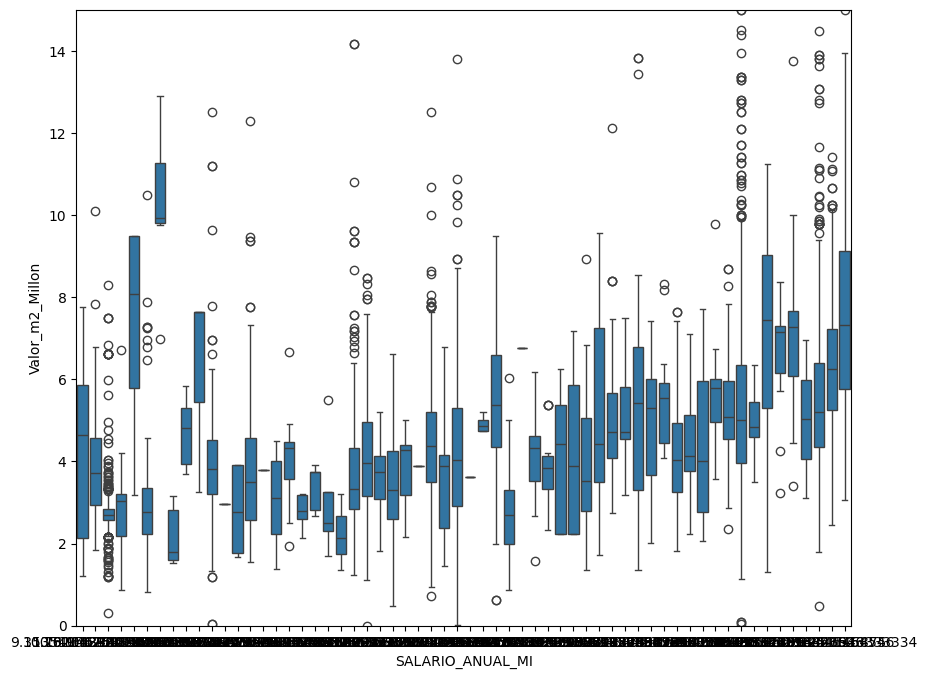

In [147]:
# gráfico de caja que muestra la relación: 'salario_anual_mill' VS 'valor_m2_millon'
plt.figure(figsize=(10,8))
sns.boxplot(data = datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.ylim((0,15)) #limita el rango de valores mostrados en el eje y
plt.show()

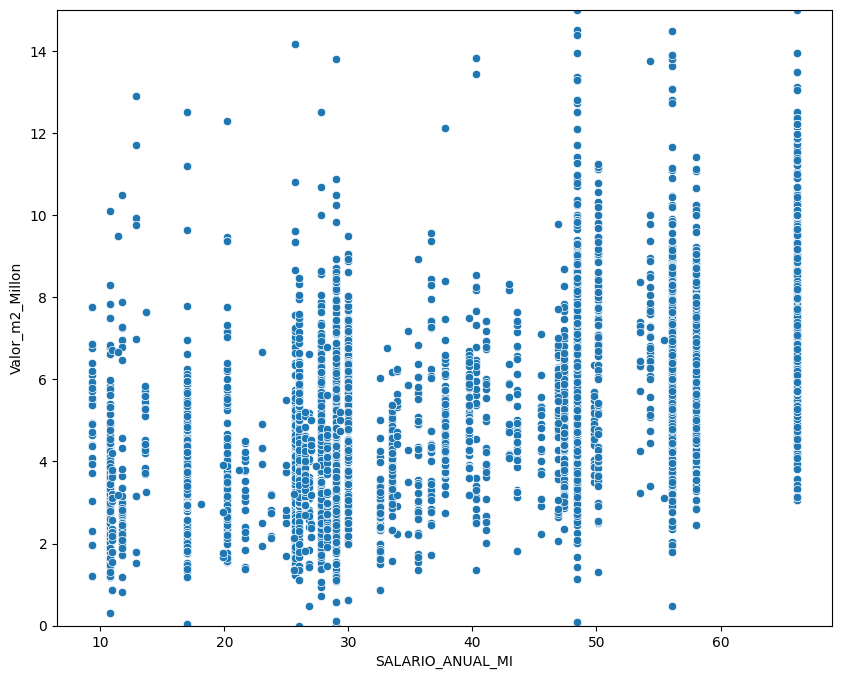

In [148]:
# gráfico de dispersión que muestra la relación: 'salario_anual_mill' VS 'valor_m2_millon'
plt.figure(figsize=(10,8))
sns.scatterplot(data = datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.ylim((0,15)) #limita el rango de valores mostrados en el eje y
plt.show()

- El objetivo de los gráficos anteriores es encontrar una correlacion entre el 'SALARIO_ANUAL_MI' -VS- 'Valor_m2_Millon'
- El gráfico de dispersión (scatterplot) muestra mejor de la relacion entre ambas variables
- Como conclusión a lo anterior, el salario anual no tiene mucha relacion con el valor por m2 por millón en la UPZ (conjunto de Barrios que pertenecen a una Region Geografica)

In [149]:
#mapa de correlacion para datos de ML
datos_ml.corr()

<ipython-input-149-74d601714e72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banos,Area,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.000000,0.478203,0.034257,0.223795,0.223795,-0.231228,-0.177594,-0.113437,0.118577,0.063756,0.110742,0.128044,0.101542,-0.152147,-0.063179,0.057564,0.107260,0.071048,-0.094846,-0.152147
Banos,0.478203,1.000000,0.056377,0.651171,0.651171,0.078034,0.159408,0.159549,-0.194976,-0.158546,-0.081526,-0.178833,-0.196685,0.200752,0.115313,-0.088919,-0.154308,-0.095914,0.066515,0.200752
Area,0.034257,0.056377,1.000000,0.054449,0.054449,-0.035900,-0.029737,-0.007063,-0.006843,-0.011814,-0.005044,-0.004306,0.006911,-0.003600,-0.005248,0.013867,0.005758,0.005857,-0.001610,-0.003600
Precio,0.223795,0.651171,0.054449,1.000000,1.000000,0.413241,0.319345,0.207599,-0.256753,-0.180122,-0.086086,-0.246369,-0.226472,0.316147,0.109183,-0.126062,-0.215268,-0.166060,0.201985,0.316147
Precio_Millon,0.223795,0.651171,0.054449,1.000000,1.000000,0.413241,0.319345,0.207599,-0.256753,-0.180122,-0.086086,-0.246369,-0.226472,0.316147,0.109183,-0.126062,-0.215268,-0.166060,0.201985,0.316147
Valor_m2_Millon,-0.231228,0.078034,-0.035900,0.413241,0.413241,1.000000,0.496128,0.323064,-0.368181,-0.273376,-0.194699,-0.364919,-0.333413,0.459001,0.197830,-0.197200,-0.345306,-0.220443,0.270548,0.459001
Valor_m2_Barrio,-0.177594,0.159408,-0.029737,0.319345,0.319345,0.496128,1.000000,0.641575,-0.661436,-0.368000,-0.407404,-0.664067,-0.586670,0.818222,0.370521,-0.310576,-0.637839,-0.246770,0.414852,0.818222
CONJUNTO_CERRADO,-0.113437,0.159549,-0.007063,0.207599,0.207599,0.323064,0.641575,1.000000,-0.842800,-0.293056,-0.512767,-0.702296,-0.664029,0.799572,0.597001,-0.346398,-0.779449,0.043869,0.089056,0.799572
INSEGURIDAD,0.118577,-0.194976,-0.006843,-0.256753,-0.256753,-0.368181,-0.661436,-0.842800,1.000000,0.501557,0.604587,0.850343,0.746383,-0.813061,-0.540260,0.297881,0.735786,0.101097,-0.007836,-0.813061
TERMINALES_BUS,0.063756,-0.158546,-0.011814,-0.180122,-0.180122,-0.273376,-0.368000,-0.293056,0.501557,1.000000,0.380313,0.660804,0.570288,-0.515671,-0.288980,0.176191,0.351208,0.256034,-0.109400,-0.515671


La matriz de correlación estadística permite entender el nivel de relación entre dos variables. Cuanto más cercano es el valor a 1, mayor es el nivel de correlación entre dichas variables, siendo una correlación positiva. Caso contrario, cuanto más cercano es de -1 es una correlación negativa.
- La correlación entre 'SALARIO_MENSUAL_MILL' VS 'VALOR_M2_BARRIO' es de 0.459, que equivale al 46%.


In [150]:


#asi es dificil de visualizar, por lo que recurrimos a un mapa de calor (heat-map)

<ipython-input-151-119851acbebd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Correlación de las variables')

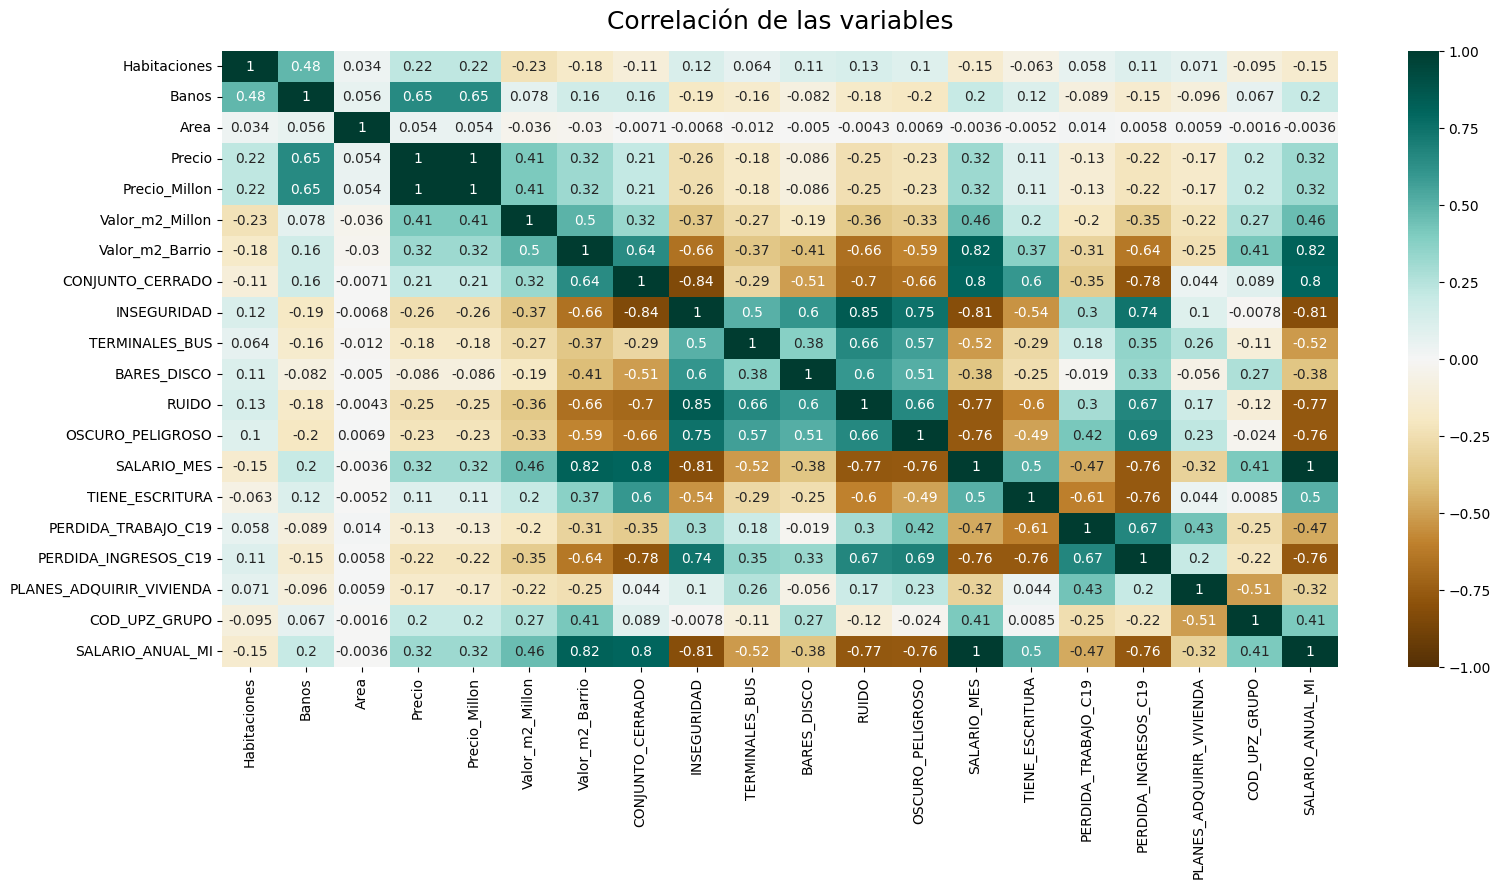

In [151]:
# mapa de calor
plt.figure(figsize=(18, 8))
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16) #titulo del mapa de calor

La asignación de colores mediante el mapa de calor facilita la visulización de correlaciones entre variables. Además, ayuda a seleccionar las variables fuertemente correlacionadas para alimentar el modelo machine learning.


##4.Machine Learning: Regresión Lineal - Parte I

Inicialmente generamos un baseline, que funionará como referencia para mejorar el modelo posteriormente. El atributo que tiene mayor correlación no es necesariamente el más interesante.

- *X*: variable a predecir, contiene una matriz.
- *y*: variable respuesta, contiene un array.

Posteriormente, seleccionamos los datos para entrenamiento (*train*) y prueba (*test*).

In [152]:
# COD_UPZ_GRUPO permite visualizar como influye que el Precio_Millon si está ubicado en determinada UPZ
X = datos_ml[['COD_UPZ_GRUPO']] #[[]] dataframe
y = datos_ml['Precio_Millon'] #[] pandas.series

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=99) # test_size: tamaño de datos para prueba; random_state: estado de aletoriedad


###4.1.Validando el modelo

In [153]:
X_train

,COD_UPZ_GRUPO
7578,810.0
8345,98.0
1246,816.0
8491,809.0
4602,47.0
...,...
5223,19.0
7929,85.0
1784,817.0
3268,14.0


- *X_train* contiene un dataframe con 6957 filas y 1 columna, correspondiente al 75% de los datos de codigo de UPZ.


In [154]:
X_test

,COD_UPZ_GRUPO
8428,809.0
3079,14.0
6927,75.0
6861,75.0
2357,14.0
...,...
7777,85.0
1423,817.0
3916,803.0
8305,98.0


- *X_test* contiene 2320 filas y una columna, equivalente al 25% de los datos de codigo UPZ.


In [155]:
y_train

7578    550.0
8345    700.0
1246    710.0
8491    400.0
4602    650.0
        ...  
5223    360.0
7929    119.0
1784    650.0
3268    350.0
7242    480.0
Name: Precio_Millon, Length: 6957, dtype: float64

- *y_train* contiene un pandas.series con longitud de 6957 filas,  que responde 75% de los datos de precio_millon


In [156]:
y_test

8428     650.0
3079     550.0
6927     327.0
6861     260.0
2357     460.0
         ...  
7777     131.0
1423     695.0
3916    1000.0
8305    1100.0
3989     265.0
Name: Precio_Millon, Length: 2320, dtype: float64

- *y_test*, igualmente con un pandas.series con logitud de 2320 filas y 1 columna, referente al 25% de los datos.


###4.2.Modelo 1 - 1 variable
El modelo de regresión lineal se entrena con los datos de entrenamiento, lo que permitirá predecir con los datos de prueba. A partir de esto comparamos la efectividad del modelo.

In [186]:
modelo_1 = LinearRegression() #instanciando el modelo de regresión lineal
modelo_1.fit(X_train,y_train) #ajustando el modelo con datos de entrenamiento

LinearRegression()

In [187]:
y_predict_test = modelo_1.predict(X_test) # prediccion con datos prueba

Con el modelo de ML y la baseline es momento de validar el modelo. Para ello se utilizan metricas/indicadores para medir el performance de nuestro modelo:

- **error absoluto medio** (mean_absolute_error):

toma la diferencia de valores que se pueden encontrar a la hora de hacer el calculo (margen de error que puede variar, ejem: +20 o -20 millones).

- **r cuadrado** (r2_score):

coeficiente de determinacion, permite observar el performance. Varia entre 0-1. Cuanto más cerca de 1 está mejor ajustado, cualquier valor inferior afecta al modelo.

In [183]:
#  se compara 'y_test' con 'y_predict_test' (los datos predichos)
baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

118.25967274431333

- El *error absoluto medio* indica que si se introduce el valor de un inmueble, este tendrá una variación de 349. millones de pesos, lo cual es demasiado error.

In [160]:
#  se compara 'y_test' con 'y_predict_test' (los datos predichos)
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.025479229587150987

- *r2* indica que el modelo, o baseline no se esta desempeñando eficientemente. 0.02 es muy cercano a 0.

- Al tener tantos atributos no es adecuado tomar un solo atributo para predecir.

###4.3.Modelo 2 - 3 variables

In [184]:
# Se adicionarion 2 atributos (Habitaciones y Banos)
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos']] # igualmente, puede experimentarse con: 'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99) #segmentando datos para entrenamiento y prueba

modelo_2 = LinearRegression() #instanciando modelo
modelo_2.fit(X_train, y_train) #ajustando modelo

y_predict_test = modelo_2.predict(X_test) #prediccion con datos prueba
y_predict_train = modelo_2.predict(X_train) #prediccion con datos entrenamiento

mae_test = mean_absolute_error(y_test, y_predict_test) #compara 'y_test' con 'y_predict_test' (datos predichos prueba)
r2_test = r2_score(y_test, y_predict_test) #compara 'y_test' con 'y_predict_test' (datos predichos de prueba)

mae_train = mean_absolute_error(y_train, y_predict_train) #compara 'y_train' con 'y_predict_train' (datos predichos entrenamiento)
r2_train = r2_score(y_train, y_predict_train) #compara 'y_train' con 'y_predict_train' (datos predichos entrenamiento)

print('- y_test VS y_predict_test:')
print('error medio absoluto:', mae_test, '- r2:', r2_test)
print('\n- y_train VS y_predict_train:')
print('error medio absoluto:', mae_train, '- r2:',r2_train)

- y_test VS y_predict_test:
error medio absoluto: 129.79569561829595 - r2: 0.4710300116377151

- y_train VS y_predict_train:
error medio absoluto: 134.0676755859009 - r2: 0.4669568993620524


Despues de añadir dos atributos más al modelo paso de un margen de error de:
- mae: 349 millones (modelo1) a 241.77 millones (modelo2)
- r2: 0.025 millones (modelo1) a 0.393 millones (modelo2)

###4.4.Modelo 3 - 6 variables

In [185]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_3 = LinearRegression()
modelo_3.fit(X_train, y_train)

y_predict_test = modelo_3.predict(X_test)
y_predict_train = modelo_3.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print('- y_test VS y_predict_test:')
print('error medio absoluto:', mae_test, '- r2:', r2_test)
print('\n- y_train VS y_predict_train:')
print('error medio absoluto:', mae_train, '- r2:',r2_train)

- y_test VS y_predict_test:
error medio absoluto: 118.25967274431333 - r2: 0.5404735562069192

- y_train VS y_predict_train:
error medio absoluto: 123.22271988681676 - r2: 0.5269614226488988


Hubo una leve mejora o disminucion en el margen de error.

- mae: 241.77 millones (modelo2) a 241.92 millones (modelo3)
- r2: 0.393 millones (modelo2) a 0.425 millones (modelo3)

Sin embargo, aun conservamos muchos outliers, por lo que debemos filtrar nuestros datos de ML.

##5.Visualización y correlación de variables numéricas - Parte I

In [179]:
datos_ml = datos_ml.query('Precio_Millon > 60 & Precio_Millon < 1200')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,48.417456
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,48.417456
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,48.417456
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,48.417456
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,48.417456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,29.344838
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,29.344838
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,29.344838
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,29.344838


- Anteriormente el filtro era: "*> 60 & Precio_Millon < 5000*", ahora es "*> 60 & Precio_Millon < 1200*".
- De 9277 filas se redujeron a 8313 filas

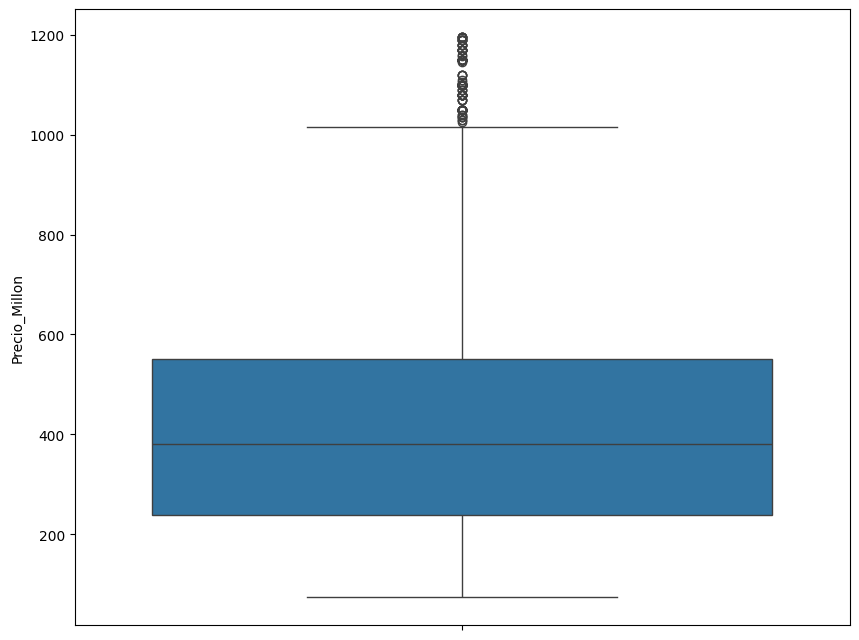

In [178]:
# gráfico de caja de 'Precio_Millon', con disminución de outliers
plt.figure(figsize=(10,8))
sns.boxplot(data = datos_ml, y = 'Precio_Millon')
plt.show()

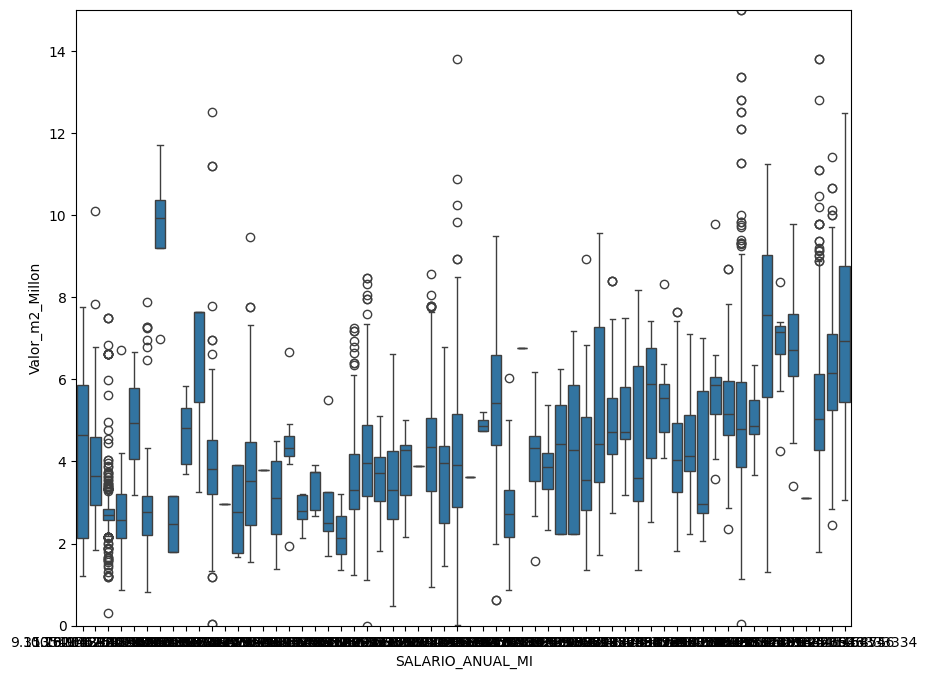

In [166]:
# gráfico de cajas 'SALARIO_ANUAL_MI' VS 'Valor_m2_Millon'
plt.figure(figsize=(10,8))
sns.boxplot(data = datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.ylim((0,15))
plt.show()

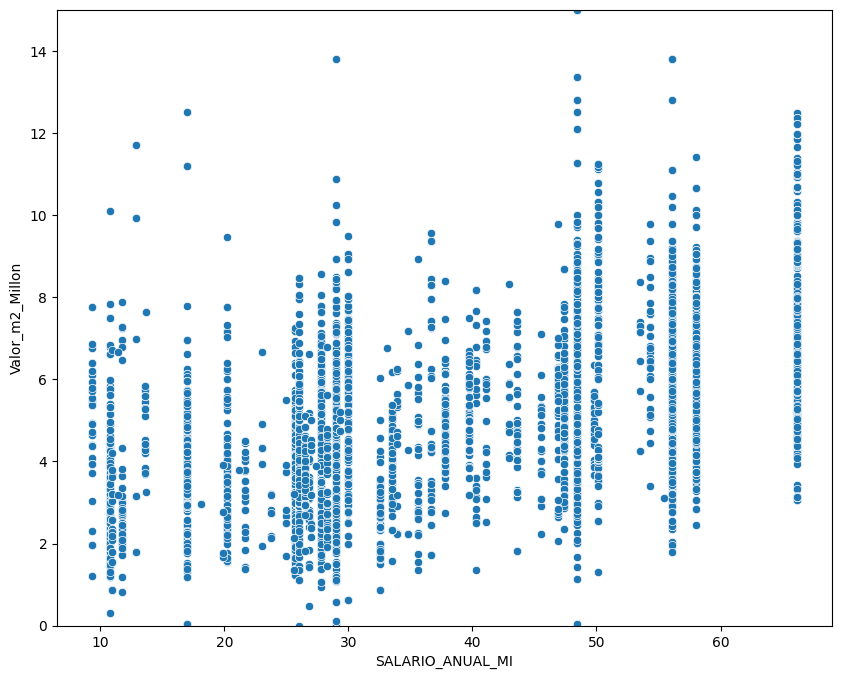

In [167]:
# gráfico de dispersion 'SALARIO_ANUAL_MI' VS 'Valor_m2_Millon'
plt.figure(figsize=(10,8))
sns.scatterplot(data = datos_ml, x='SALARIO_ANUAL_MI', y = 'Valor_m2_Millon')
plt.ylim((0,15))
plt.show()

In [168]:
# correlación estadística de variables
datos_ml.corr()

<ipython-input-168-06e284398928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banos,Area,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.000000,0.437944,0.026425,0.180190,0.180190,-0.305236,-0.206348,-0.116781,0.130780,0.082567,0.108246,0.142071,0.113696,-0.173701,-0.075084,0.066055,0.128659,0.092329,-0.119178,-0.173701
Banos,0.437944,1.000000,0.038967,0.657343,0.657343,-0.032011,0.129202,0.160765,-0.192636,-0.167372,-0.117368,-0.169937,-0.213476,0.180707,0.125254,-0.087964,-0.151305,-0.078863,0.011584,0.180707
Area,0.026425,0.038967,1.000000,0.044533,0.044533,-0.038871,-0.036112,-0.008843,-0.004490,-0.009574,-0.009502,-0.001511,0.008433,-0.008979,-0.006919,0.016999,0.008122,0.010482,-0.008786,-0.008979
Precio,0.180190,0.657343,0.044533,1.000000,1.000000,0.357927,0.404354,0.319729,-0.370115,-0.278653,-0.228913,-0.345588,-0.378880,0.419877,0.208956,-0.170754,-0.324754,-0.184576,0.169701,0.419877
Precio_Millon,0.180190,0.657343,0.044533,1.000000,1.000000,0.357927,0.404354,0.319729,-0.370115,-0.278653,-0.228913,-0.345588,-0.378880,0.419877,0.208956,-0.170754,-0.324754,-0.184576,0.169701,0.419877
Valor_m2_Millon,-0.305236,-0.032011,-0.038871,0.357927,0.357927,1.000000,0.488232,0.328564,-0.368261,-0.287523,-0.219416,-0.365298,-0.351003,0.458623,0.230888,-0.199966,-0.358184,-0.213243,0.255115,0.458623
Valor_m2_Barrio,-0.206348,0.129202,-0.036112,0.404354,0.404354,0.488232,1.000000,0.652792,-0.662995,-0.375789,-0.412836,-0.662919,-0.596781,0.821460,0.407004,-0.311922,-0.646193,-0.230169,0.410025,0.821460
CONJUNTO_CERRADO,-0.116781,0.160765,-0.008843,0.319729,0.319729,0.328564,0.652792,1.000000,-0.844006,-0.300256,-0.506335,-0.700831,-0.665775,0.807853,0.609080,-0.345390,-0.782178,0.054712,0.084535,0.807853
INSEGURIDAD,0.130780,-0.192636,-0.004490,-0.370115,-0.370115,-0.368261,-0.662995,-0.844006,1.000000,0.508933,0.604341,0.847356,0.746604,-0.816117,-0.558349,0.294608,0.738474,0.087177,0.002619,-0.816117
TERMINALES_BUS,0.082567,-0.167372,-0.009574,-0.278653,-0.278653,-0.287523,-0.375789,-0.300256,0.508933,1.000000,0.394339,0.669703,0.574392,-0.514077,-0.302773,0.173727,0.358281,0.253485,-0.094974,-0.514077


<ipython-input-169-5c6c2cd55e32>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


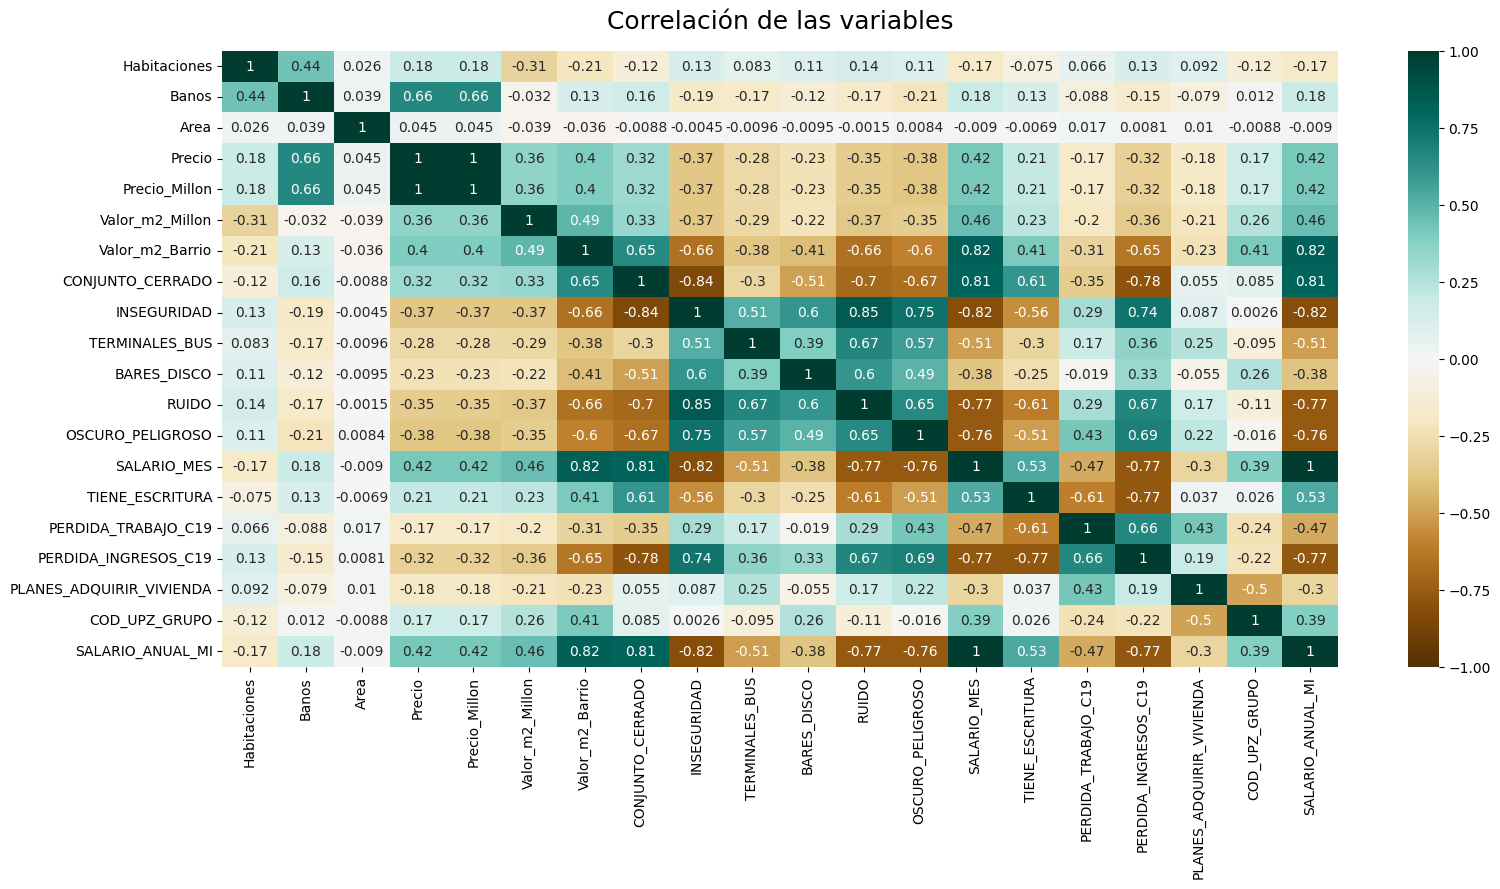

In [169]:
# mapa de calor
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

##6.Machine Learning: Regresión Lineal - Parte II

*Recordando las métricas que evaluan el desempeño del modelo:*

- **error absoluto medio** (mean_absolute_error):

toma la diferencia de valores que se pueden encontrar a la hora de hacer el calculo (margen de error que puede variar, ejem: +20 o -20 millones).

- **r cuadrado** (r2_score):

coeficiente de determinacion, permite observar el performance. Varia entre 0-1. Cuanto más cerca de 1 está mejor ajustado, cualquier valor inferior afecta al modelo.

###6.1.Modelo 1 - 1 variable

In [198]:
X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=99)

modelo_1 = LinearRegression()
modelo_1.fit(X_train,y_train)

y_predict_test = modelo_1.predict(X_test)

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)

print('error medio absoluto:', baseline_mae)
print('r2:', baseline_r2)

error medio absoluto: 187.323609443345
r2: 0.031111799984413713


###6.2.Modelo 2 - variables

In [194]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_2 = LinearRegression()
modelo_2.fit(X_train, y_train)

y_predict_test = modelo_2.predict(X_test)
y_predict_train = modelo_2.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print('- y_test VS y_predict_test:')
print('error medio absoluto:', mae_test, '- r2:', r2_test)
print('\n- y_train VS y_predict_train:')
print('error medio absoluto:', mae_train, '- r2:',r2_train)

- y_test VS y_predict_test:
error medio absoluto: 129.79569561829595 - r2: 0.4710300116377151

- y_train VS y_predict_train:
error medio absoluto: 134.0676755859009 - r2: 0.4669568993620524


###6.3.Modelo 3 - 6 variables

In [192]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

modelo_3 = LinearRegression()
modelo_3.fit(X_train, y_train)

y_predict_test = modelo_3.predict(X_test)
y_predict_train = modelo_3.predict(X_train)

mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print('- y_test VS y_predict_test:')
print('error medio absoluto:', mae_test, '- r2:', r2_test)
print('\n- y_train VS y_predict_train:')
print('error medio absoluto:', mae_train, '- r2:',r2_train)

- y_test VS y_predict_test:
error medio absoluto: 118.25967274431333 - r2: 0.5404735562069192

- y_train VS y_predict_train:
error medio absoluto: 123.22271988681676 - r2: 0.5269614226488988


- Se ha obtenido un mejor desempeño en los datos tanto de prueba como en los de entrenamiento
- Inclusive, los de datos de prueba tuvieron mejor desempeño que los de entrenamiento.

##7.Prediciendo precios de inmueble:
Es momento utilizar el modelo para realizar predicciones de precios de inmuebles.

In [190]:
#prediciendo el valor de un inmueble
modelo_3.predict([[816,3,2,1,50,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.21129691])

- Los valores que recibe el modelo, correspoden sucesivamente a 'COD_UPZ', 'HABITACIONES', 'BANOS', 'SALARIO_ANUAL', 'TIENE ESCRITURA'.
- El resultado es un array con estos valores indican cuanto va a costar el inmueble.
- Según los datos proporcionados al modelo, un inmueble con estas características costaría: **$ 434 millones de pesos**